# Writing Functions - Python

A function is basically a sequence of operations. It may take inputs via arguments. And it may give the result by returning value.

Let us define a function square which basically gives square of whatever we pass as argument.

You can visualize a function like this. There is input and there is output.

In [1]:
def sq(x):
    return x*x

In [2]:
sq(4)

16

In [3]:
sq(10)

100

In [4]:
# function could also take multiple arguments
# Here a and b are the two arguments and function is returning a single value.
def add(a, b):
    return a+b

add(10, 20)

30

In [5]:
add(10.5, 120)

130.5

## Variable arguments to a function

In [6]:
# We can define functions with variable arguments
def sum(*args):
    s = 0
    for i in args:
        s += i
    return s

In [7]:
sum(1)

1

In [8]:
sum(2, 3)

5

In [9]:
sum(2, 3, 4)

9

## Calling a function with variable arguments

In [10]:
# If we have a usual function such as the following:

def add(a, b, c):
    return a+b+c

# we can call it using variable argument by putting an asterix
arr = range(3)
arr
add(*arr)

3

## Passing a function as argument

In python, you can pass a function in another function just like another variable.

In [11]:
def double_it(x):
    return 2*x

def apply_transformation(f, arr):
    result = []
    for a in arr:
        v = f(a)
        result.append(v)
    return result
apply_transformation(double_it, [1,2,3])

[2, 4, 6]

In [12]:
# Similarly we can us another function - the one that we defined above.
apply_transformation(sq, [1,2,3])

[1, 4, 9]

# Differentiation

Differentiation is basically about finding the rate of change.

Rate of change of distance is velocity. Rate of change of velocity is acceleration.

If you plot rate of change of y with respect to x for a straight line y = mx +c , you will get a constant horizontal line.

If you plot, rate of change of y with respect to x for a parabola, it gives a straight line.

![image.png](attachment:image.png)

![image.png](attachment:image.png)

## Numeric Differentiation

![image.png](attachment:image.png)

In [13]:
# Slightly increase x and compute the result.
# Then compute the ratio of change in result with change in x

def diff(fn, x):
    delta = 0.000000000001
    y = fn(x)
    x1 = x + delta
    y1 = fn(x1)
    return (y1 - y)/(x1 - x)

In [14]:
diff(sq, 2)

4.0

In [15]:
x = 2
2*x

4

In [16]:
def cb(x):
    return x*x*x
cb(10)

1000

In [17]:
diff(cb, 2)

12.0

In [18]:
# If you know symbolic / algebric differentiation,
# you would be knowing that the differentiation of an algebric function x^3 is 3*x^2.
# The result that we computed above is same as the algebric differentiation
x = 2
3*x**2

12

## Partial Derivative

If there is function which is taking multiple inputs, the rate of change of output could be computed with respect of any of the inputs.


In [19]:

# Here is a very simple function
def fn(x1, x2):
    return x1*5 + x2*x2

# Lets calculate the rate of change of output of this function wrt x1
x1 = 10
x2 = 20
delta_x = 0.000000000001

delta_y = fn(x1+delta_x, x2) - fn(x1, x2)
df_dx1 = delta_y / delta_x

print(df_dx1)

5.002220859751105


In [20]:
# Now, lets calculate the rate of change of output of this function wrt x2

delta_y = fn(x1, x2+delta_x) - fn(x1, x2)
df_dx2 = delta_y / delta_x
print(df_dx2)

39.960923459148034


In [21]:
import numpy as np

# The first argument is the function,
# second argument is the idx of the input with respect to which we are differentiating.
# Third arguments is a variable arguments - there can be many values. The function is called with these values.

def diffp(fn, idx, *args):
    delta = 0.000000000001

    # Call the underlying function with args as such
    y = fn(*args)

    # Now, increase only one input - at idx.
    args = list(args)
    args[idx] += delta

    # Now, calulate the output after changing one of the inputs a little bit.
    y1 = fn(*args)
    return (y1 - y)/delta


In [22]:
# Let us test it using a very simple function.
# This function can be differentiated with respect to m, c or x.
def line_y(m, c, x):
    return m*x + c
print(line_y(1,2,3))
# Notice how we are passing the function as the first argument.
# The second argument is the index of the value with respect to which we are differentiating
# Remaining values are the values of the arguments to be passed while calling line_y
diffp(line_y, 0, 1, 2, 3) # differentiate wrt m

5


3.000266701747023

In [23]:
diffp(line_y, 1, 1, 2, 3) # differentiate wrt c

1.000088900582341

In [24]:
diffp(line_y, 2, 1, 2, 3) # differentiate wrt x

1.000088900582341

## Chain Rule



In [25]:
x = 2
dt_dx = diffp(sq, 0, x)
dt_dx

4.000355602329364

In [26]:
t = sq(2)
dy_dt = diffp(cb, 0, t)

In [27]:
dt_dx * dy_dt

192.03413934105515

# Gradient descent

When we have a function and we want to find out at what point this function would attain a minima or maxima.
See more here: https://youtu.be/4Cu9fizAtAo

In [28]:
# Let us first generate some data

import numpy as np

# Generate 100 random numbers
X = 2*np.random.random((100, 1))

In [29]:
# Now, let us generate the values of y corresponding to a line with slope 3 and intercept 4
# plus some noise
y = 4 + 3 * X + .3*np.random.randn(100, 1)

In [30]:
# Let us take a look at first three records
y[0:3]

array([[8.53389845],
       [7.92307626],
       [5.68645015]])

In [31]:
X[0:3]

array([[1.48168046],
       [1.34225111],
       [0.53129451]])

In [32]:
4+3*X[0:3]

array([[8.44504138],
       [8.02675332],
       [5.59388352]])

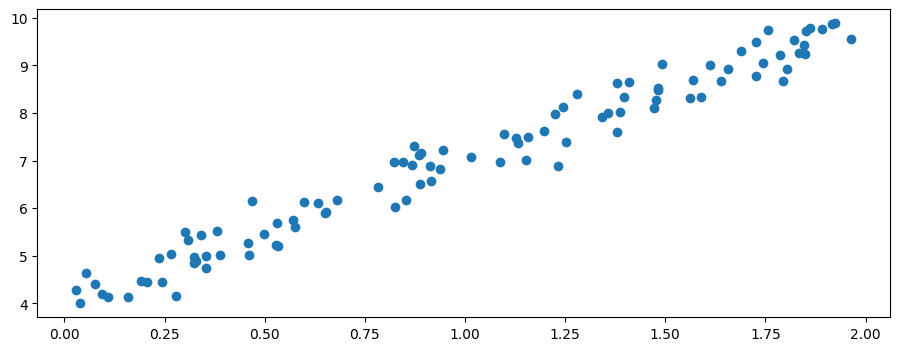

In [33]:
# Let us plot it using matplotlib

from matplotlib import pyplot as plt

plt.figure(figsize=(11,4))
plt.scatter(X, y)
plt.show()

# horizontal axis is x and vertical axis is y

In [34]:
def error(m, c, X, y):
    ypred = m*X + c
    err = ypred-y
    return np.sum(err*err)

In [35]:
error(3, 4, np.array([1,2,3]), np.array([1,2,3]))

200

In [36]:
error(3, 4, X, y)

10.376610853385815

In [37]:
error(3.04, 4, X, y)

10.663352577311258

![image.png](attachment:image.png)

In [43]:
def grad_fit(X, y):
    m = np.random.random()
    c = np.random.random()
    learning_rate = 0.001
    for i in range(100):
        print("i: ", i, " Error: ", error(m, c, X, y),"m=",m,"c=",c)
        dE_dm = diffp(error, 0, m, c, X, y)
        dE_dc = diffp(error, 1, m, c, X, y)

        m = m - learning_rate * dE_dm
        c = c - learning_rate * dE_dc
    return (m, c)

In [44]:
m, c = grad_fit(X, y)

i:  0  Error:  5114.307279043198 m= 0.02441482556740804 c= 0.04992468316372212
i:  1  Error:  1639.4658068021663 m= 1.6123925748629406 c= 1.4378135980692106
i:  2  Error:  538.5243601536197 m= 2.4961940513107836 c= 2.2304382306643173
i:  3  Error:  189.45014971962846 m= 2.983796898298795 c= 2.6872319446297706
i:  4  Error:  78.15816751516475 m= 3.2493409295070594 c= 2.9549644474641763
i:  5  Error:  42.25535598322461 m= 3.389943126059268 c= 3.1159450096779846
i:  6  Error:  30.24890075228098 m= 3.460592390275895 c= 3.216550755634257
i:  7  Error:  25.84635805425683 m= 3.4921404877436433 c= 3.282890578158499
i:  8  Error:  23.88845224560921 m= 3.5019282139287387 c= 3.329637184744156
i:  9  Error:  22.73860710454788 m= 3.4997255314478823 c= 3.365071950976512
i:  10  Error:  21.876927073839163 m= 3.4910178302211423 c= 3.3938595899158326
i:  11  Error:  21.136806060012585 m= 3.4788888657217174 c= 3.418639767825466
i:  12  Error:  20.463824576982187 m= 3.465043940515432 c= 3.440883308168436

In [40]:
m, c

(2.9852010761279195, 4.016963250946339)

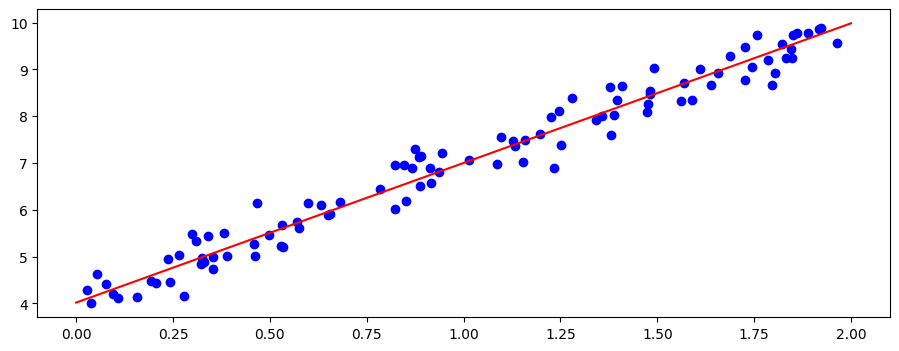

In [41]:
from matplotlib import pyplot as plt

x1 = 0
x2 = 2

y1 = m*x1 + c
y2 = m*x2 + c

ycap = m*X + c
plt.figure(figsize=(11,4))
plt.subplot()

# plt.scatter(X, ycap, color='r')
plt.plot([x1, x2], [y1, y2], color = 'r')
plt.subplot()
plt.scatter(X, y, color='b')
plt.show()

In [42]:
# Compute theta hat

# Apply the normal equation
# inv() function from NumPy’s Linear Algebra module (np.linalg) to compute the inverse of a matrix
# the dot() method for matrix multiplication

theta_best = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
theta_best

array([[5.97947509]])